<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Виды распределений

Загрузить таблицу и построить график распределений. Найти нормальное распределение.

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

Таблица цен на дома в Бостоне

Основные значения:

* CRIM: This is the per capita crime rate by town
* ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
* INDUS: This is the proportion of non-retail business acres per town.
* CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
* NOX: This is the nitric oxides concentration (parts per 10 million)
* RM: This is the average number of rooms per dwelling
* AGE: This is the proportion of owner-occupied units built prior to 1940
* DIS: This is the weighted distances to five Boston employment centers
* RAD: This is the index of accessibility to radial highways
* TAX: This is the full-value property-tax rate per 10,000 dollars
* PTRATIO: This is the pupil-teacher ratio by town
* B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
* LSTAT: This is the percentage lower status of the population
* MEDV: This is the median value of owner-occupied homes in 1000 dollars

In [2]:
url='http://yustiks.ru/housing.csv'
s=requests.get(url).content
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data=pd.read_csv(io.StringIO(s.decode('utf-8')),  delim_whitespace=True, names=names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Нарисовать частотные графики для всех значений. Можете ли вы найти следующие распределения в данных графиках?


1.   Нормальное
2.   Равномерное
3.   Биноминальное
4.   Бернулли
5.   Геометрическое
6.   Логнормальное



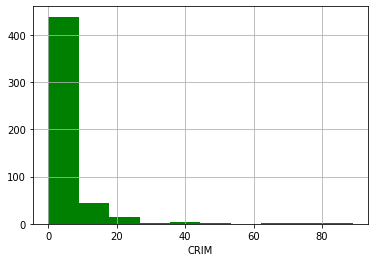

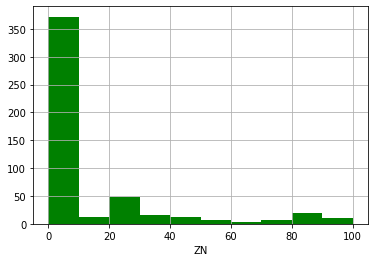

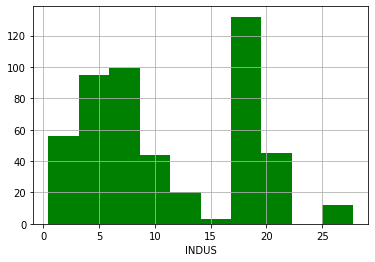

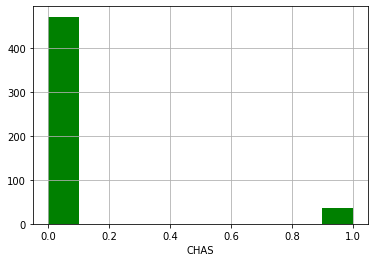

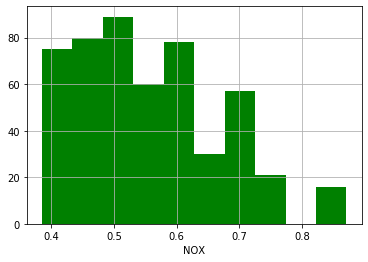

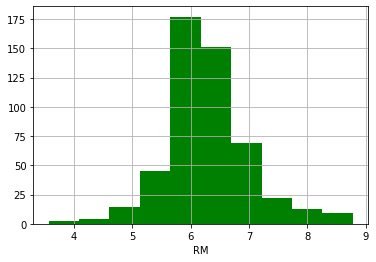

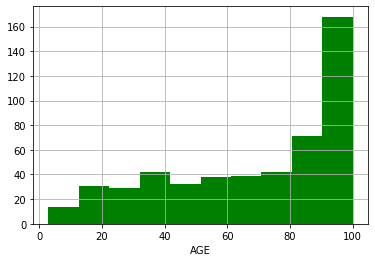

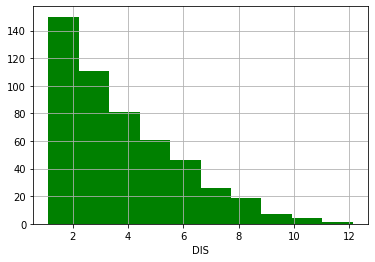

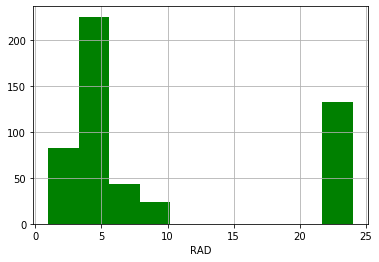

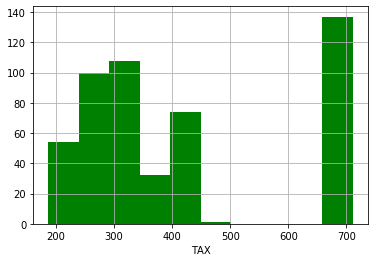

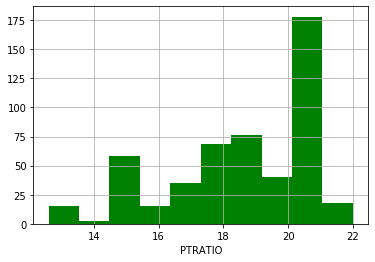

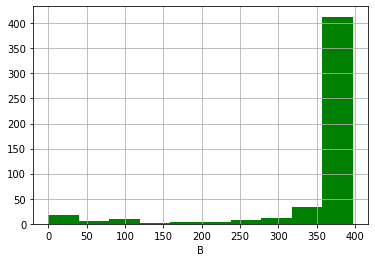

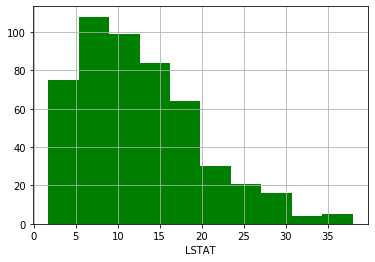

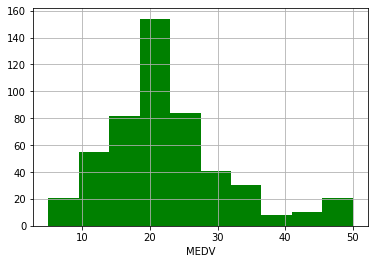

In [7]:
for i in names:
    n, bins, patches = plt.hist(data[i], facecolor='g')
    plt.xlabel(i)
    plt.grid(True)
    plt.show()

Нормальное- RM
Равномерное - Indus
Биноминальное - MEDV
Бернулли - CHAS.  RAD можно назвать распределение Бернулли?
Геометрическое - CRIM
Логнормальное - LSTAT, NOX?

Написать **линейную регрессию** на два атрибута. Допустим, мы хотим предсказать цену дома (MEDV) в Бостоне, зная что цена на дом имеет линейную зависимость с атрибутом LSTAT. 



1.   Разделить данные на 80% тренировочных, 20% тестовых
2.   Составить модель линейной регрессии
3.   Посчитать ошибку модели на тестовых данных
4.   Сделать точечный график данных и полученной прямой линейной регрессии



In [21]:
medv = data['MEDV']
lstat = data['LSTAT']
medv = np.array(medv).reshape(-1,1)
lstat = np.array(lstat).reshape(-1,1)

In [22]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    medv,
    lstat,
    test_size = 0.2,
    random_state = 3
)

In [24]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
predicted_y = model.predict(X_test)
model.score(X_test, y_test)

0.5663680841829948

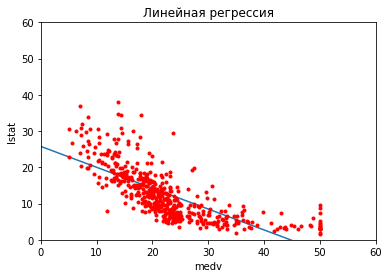

In [27]:
plt.xlabel('medv')
plt.ylabel('lstat')
plt.title('Линейная регрессия')
# Построим прямую для регрессии
# Создадим 100 точек для предсказаний
x = np.linspace(0, 100, 50)
# Посчитаем предсказанные значения
y = model.coef_*x + model.intercept_
y = np.transpose(y)
plt.plot(x,y)
plt.plot(medv, lstat, 'r.')
plt.xlim(0,60)
plt.ylim(0,60)
plt.show()

Загрузить таблицу Happiness report. Посчитать матрицу ковариаций попарно. 

In [41]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
data=pd.read_csv(url)
data.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Сколько в данной таблице отсутствующих значений? Написать ответ. Если есть отсутствующие значения в выборке country, убрать (drop). Написать код.

In [42]:
 data.isnull().sum()


Country (region)            0
Ladder                      0
SD of Ladder                0
Positive affect             1
Negative affect             1
Social support              1
Freedom                     1
Corruption                  8
Generosity                  1
Log of GDP\nper capita      4
Healthy life\nexpectancy    6
dtype: int64

In [46]:

data.dropna(subset=['Country (region)'])

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0
5,Switzerland,6,11,44.0,21.0,13.0,11.0,7.0,16.0,8.0,4.0
6,Sweden,7,18,34.0,8.0,25.0,10.0,6.0,17.0,13.0,17.0
7,New Zealand,8,15,22.0,12.0,5.0,8.0,5.0,8.0,26.0,14.0
8,Canada,9,23,18.0,49.0,20.0,9.0,11.0,14.0,19.0,8.0
9,Austria,10,10,64.0,24.0,31.0,26.0,19.0,25.0,16.0,15.0


In [233]:
X = data.iloc[:,1:]
X.head()

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy,Continent
0,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0,Europe
1,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0,Europe
2,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0,Europe
3,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0,Europe
4,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0,Europe


In [234]:
X.fillna(0,inplace=True)
#X = (X - X.mean()) / X.std()

In [232]:
np.cov(X)

array([[ 0.14697405,  0.06217641,  0.02560638, ...,  0.07385434,
        -0.03916034, -0.10409873],
       [ 0.06217641,  0.04654658,  0.03224484, ..., -0.00317364,
        -0.0033787 , -0.01544088],
       [ 0.02560638,  0.03224484,  0.03369284, ...,  0.00679626,
         0.0072483 , -0.01870492],
       ...,
       [ 0.07385434, -0.00317364,  0.00679626, ...,  0.74644433,
         0.15627924, -0.01348393],
       [-0.03916034, -0.0033787 ,  0.0072483 , ...,  0.15627924,
         0.14051188,  0.15880085],
       [-0.10409873, -0.01544088, -0.01870492, ..., -0.01348393,
         0.15880085,  0.46067741]])

In [78]:
np.round_(np.cov(X.T),decimals=2)

array([[1.  , 0.54, 0.5 , 0.53, 0.82, 0.55, 0.22, 0.5 , 0.76, 0.77],
       [0.54, 1.  , 0.08, 0.61, 0.59, 0.25, 0.24, 0.39, 0.61, 0.58],
       [0.5 , 0.08, 1.  , 0.4 , 0.4 , 0.69, 0.22, 0.37, 0.3 , 0.31],
       [0.53, 0.61, 0.4 , 1.  , 0.63, 0.44, 0.17, 0.35, 0.53, 0.49],
       [0.82, 0.59, 0.4 , 0.63, 1.  , 0.46, 0.14, 0.45, 0.71, 0.7 ],
       [0.55, 0.25, 0.69, 0.44, 0.46, 1.  , 0.41, 0.5 , 0.39, 0.38],
       [0.22, 0.24, 0.22, 0.17, 0.14, 0.41, 1.  , 0.28, 0.29, 0.15],
       [0.5 , 0.39, 0.37, 0.35, 0.45, 0.5 , 0.28, 1.  , 0.48, 0.41],
       [0.76, 0.61, 0.3 , 0.53, 0.71, 0.39, 0.29, 0.48, 1.  , 0.76],
       [0.77, 0.58, 0.31, 0.49, 0.7 , 0.38, 0.15, 0.41, 0.76, 1.  ]])

Сколько стран в выборке? Написать ответ. 

In [81]:
data.groupby(['Country (region)']).count()

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
Country (region),,,,,,,,,,
Afghanistan,1,1,1,1,1,1,1,1,1,1
Albania,1,1,1,1,1,1,1,1,1,1
Algeria,1,1,1,1,1,1,1,1,1,1
Argentina,1,1,1,1,1,1,1,1,1,1
Armenia,1,1,1,1,1,1,1,1,1,1
Australia,1,1,1,1,1,1,1,1,1,1
Austria,1,1,1,1,1,1,1,1,1,1
Azerbaijan,1,1,1,1,1,1,1,1,1,1
Bahrain,1,1,1,1,1,1,0,1,1,1


In [ ]:
# В выборке 156 стран

Добавить новую колонку в таблицу - 'continent'. Каждая страна относится к определенному материку. Всего материко 6:
*   Евразия,
*   Африка,
*   Северная Америка,
*   Южная Америка,
*   Австралия,
*   Антарктида.

Таким образом, мы можем классифицировать каждый элемент как член определенного класса - континента. 

In [113]:
data.rename(columns={'Country (region)': 'Country'},inplace=True)

In [102]:
url="e://Netology//doc//Country1.csv"
https://datahub.io/JohnSnowLabs/country-and-continent-codes-list/r/0.html
cnt=pd.read_csv(url,names=['Country','Continent'],sep=';')
cnt.head()

,Country,Continent
0,Абхазия,Азия
1,Австралия,Австралия и Океания
2,Австрия,Европа
3,Азербайджан,Азия
4,Албания,Европа


In [120]:
url="e://Netology//doc//Country2.csv"

cnt=pd.read_csv(url)
cnt.head(100)

,Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Number
0,Asia,AS,"Afghanistan, Islamic Republic of",AF,AFG,4.0
1,Europe,EU,"Albania, Republic of",AL,ALB,8.0
2,Antarctica,AN,Antarctica (the territory South of 60 deg S),AQ,ATA,10.0
3,Africa,AF,"Algeria, People's Democratic Republic of",DZ,DZA,12.0
4,Oceania,OC,American Samoa,AS,ASM,16.0
5,Europe,EU,"Andorra, Principality of",AD,AND,20.0
6,Africa,AF,"Angola, Republic of",AO,AGO,24.0
7,North America,NaN,Antigua and Barbuda,AG,ATG,28.0
8,Europe,EU,"Azerbaijan, Republic of",AZ,AZE,31.0
9,Asia,AS,"Azerbaijan, Republic of",AZ,AZE,31.0


In [213]:
def continent(cnt_row):
    for index, row in cnt.iterrows():        
        if cnt_row.Country in row.Country_Name:
            #print(cnt['Country_Name'])
            return row.Continent_Name
    return ''
    

In [214]:
data['Continent'] = data.apply(continent, axis=1)

In [222]:
data.head(150)

,Country,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy,Continent
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0,Europe
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0,Europe
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0,Europe
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0,Europe
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0,Europe
5,Switzerland,6,11,44.0,21.0,13.0,11.0,7.0,16.0,8.0,4.0,Europe
6,Sweden,7,18,34.0,8.0,25.0,10.0,6.0,17.0,13.0,17.0,Europe
7,New Zealand,8,15,22.0,12.0,5.0,8.0,5.0,8.0,26.0,14.0,Oceania
8,Canada,9,23,18.0,49.0,20.0,9.0,11.0,14.0,19.0,8.0,North America
9,Austria,10,10,64.0,24.0,31.0,26.0,19.0,25.0,16.0,15.0,Europe


Нарисовать sns.pairplot для класса - континет. Из графика сделать вывод о том, какие континеты похожи.

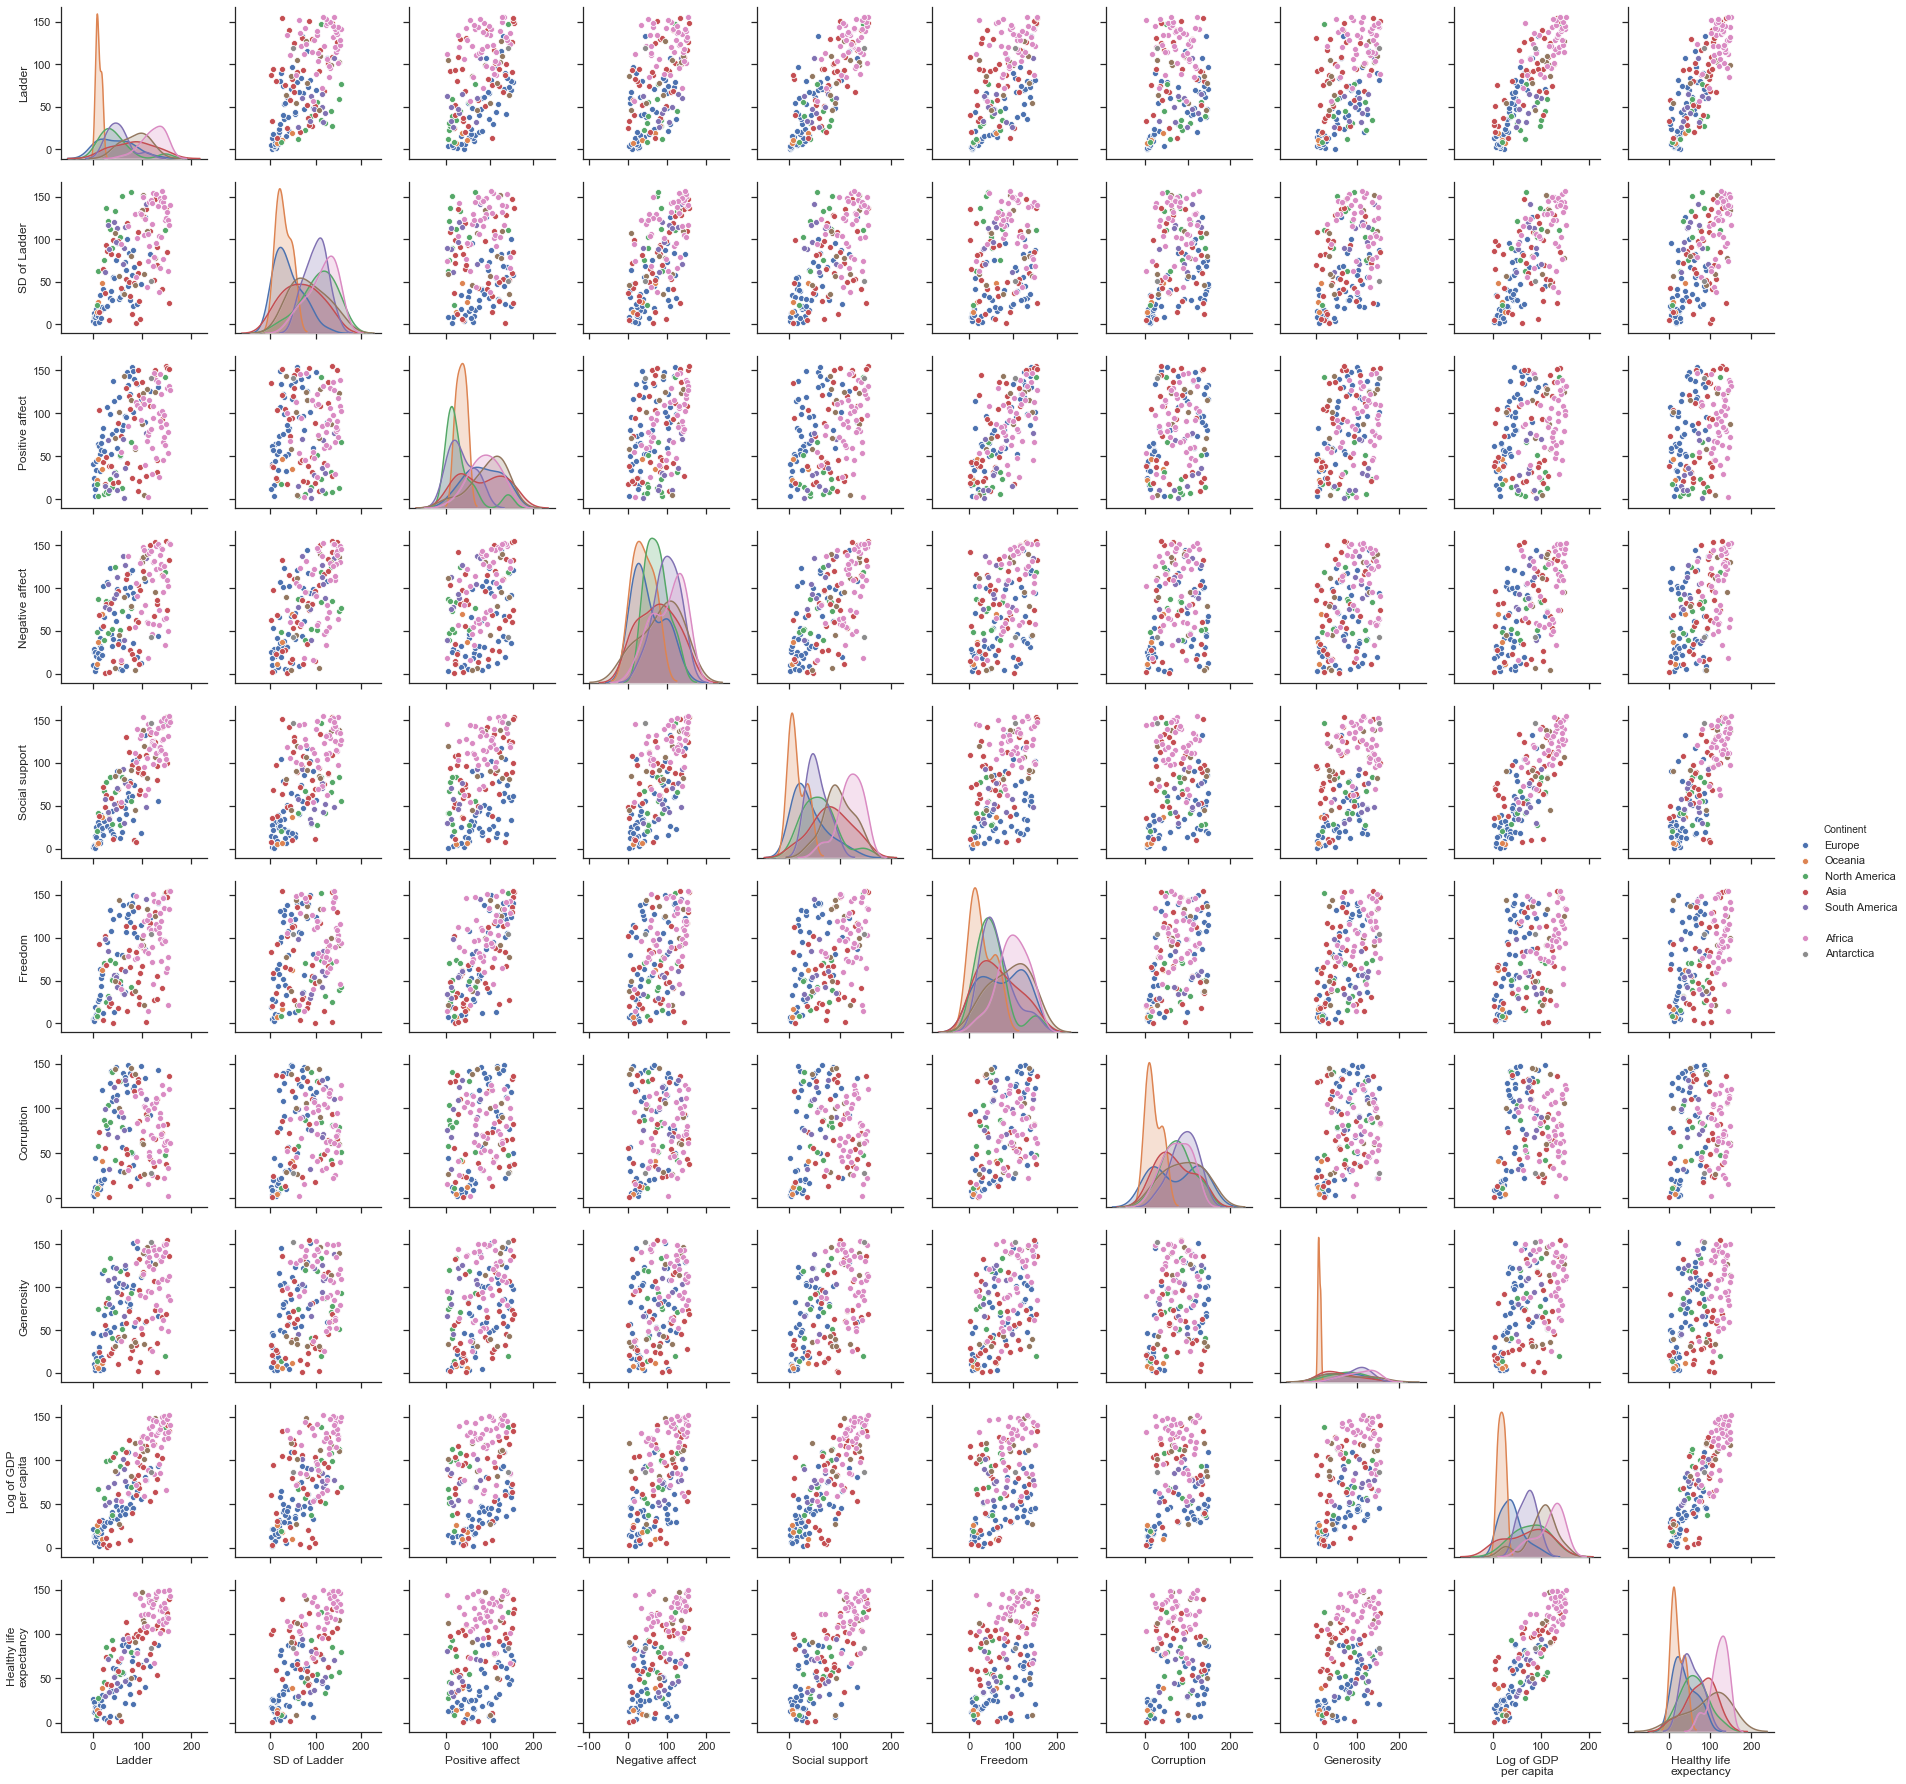

In [223]:
# пример кода на точечный график по континентам
sns.set(style="ticks", color_codes=True)
fig = sns.pairplot(data=data, hue='Continent')
#plt.show()

In [ ]:
# Африка стоит особняком почти на всех графиках

Построить матрицу корреляций для таблицы. Какие можно сделать выводы?

In [224]:
np.round_(X.corr(), decimals=2)

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
Ladder,1.00,0.54,0.50,0.53,0.82,0.55,0.22,0.50,0.76,0.77
SD of Ladder,0.54,1.00,0.08,0.61,0.59,0.25,0.24,0.39,0.61,0.58
Positive affect,0.50,0.08,1.00,0.40,0.40,0.69,0.22,0.37,0.30,0.31
Negative affect,0.53,0.61,0.40,1.00,0.63,0.44,0.17,0.35,0.53,0.49
Social support,0.82,0.59,0.40,0.63,1.00,0.46,0.14,0.45,0.71,0.70
Freedom,0.55,0.25,0.69,0.44,0.46,1.00,0.41,0.50,0.39,0.38
Corruption,0.22,0.24,0.22,0.17,0.14,0.41,1.00,0.28,0.29,0.15
Generosity,0.50,0.39,0.37,0.35,0.45,0.50,0.28,1.00,0.48,0.41
Log of GDP\nper capita,0.76,0.61,0.30,0.53,0.71,0.39,0.29,0.48,1.00,0.76
Healthy life\nexpectancy,0.77,0.58,0.31,0.49,0.70,0.38,0.15,0.41,0.76,1.00


**Регрессионный анализ** - можно ли провести линейную зависимость между двумя выборками. Возьмем Ladder - удовлетворение жизнью, и generosity - доброта. Мы хотим найти прямую, которая разделит точки в пространстве наполовину. Это можно сделать графически. Нарисовать график. Можно ли сказать, что данная прямая является собственным вектором? Сделать график регрессионной прямой на данных и собственных векторов. 

In [247]:
import numpy.linalg as la
import math
from sklearn.preprocessing import StandardScaler

ladder =X['Ladder']
generosity = X['Generosity']
model = LinearRegression()
ladder = np.array(ladder).reshape(-1,1)
generosity = np.array(generosity).reshape(-1,1)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    ladder,
    generosity,
    test_size = 0.2,
    random_state = 3
)
model.fit(X_train, y_train)
predicted_y = model.predict(X_test)


    
   #  plt.plot([petal_length.mean(), petal_length.mean() + math.sqrt(w[i]) * v[:,i][0]], 
    #         [petal_width.mean(), petal_width.mean() + math.sqrt(w[i]) * v[:,i][1]],color='red', linewidth=3)

In [251]:
ladder =X['Ladder']
generosity = X['Generosity']
Y = np.vstack((ladder, generosity)).T
w,v = la.eig(np.cov(Y.T))



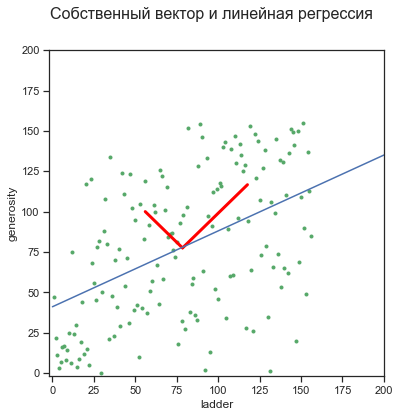

In [254]:
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.suptitle('Собственный вектор и линейная регрессия', fontsize=16)    
plt.plot(ladder, generosity, 'g.', zorder=1)
plt.xlabel('ladder')
plt.xlim(-2,200)
plt.ylabel('generosity')
plt.ylim(-2,200)
plt.plot([ladder.mean(), ladder.mean() + math.sqrt(w[0]) * v[:,0][0]], 
             [generosity.mean(), generosity.mean() + math.sqrt(w[0]) * v[:,0][1]],color='red', linewidth=3)
plt.plot([ladder.mean(), ladder.mean() + math.sqrt(w[1]) * v[:,1][0]], 
             [generosity.mean(), generosity.mean() + math.sqrt(w[1]) * v[:,1][1]],color='red', linewidth=3)
    
x = np.linspace(0, 200, 50)
# Посчитаем предсказанные значения
y = model.coef_*x + model.intercept_
y = np.transpose(y)
plt.plot(x,y)
plt.show()

# Дискретное распределение случайной величины

Напишите код для моделирования 10 подбрасываний игрального кубика. Начертите диаграму histogram. Какое это распределение?

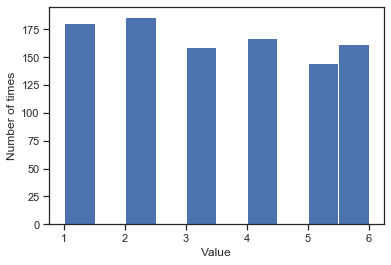

In [260]:
import pylab
import random

number_of_trials =1000
## Here we simulate the repeated throwing of a single six-sided die
list_of_values = []
for i in range(number_of_trials):
    list_of_values.append(random.randint( 1,6))


pylab.hist(list_of_values)
pylab.xlabel('Value')
pylab.ylabel('Number of times')
pylab.show()


In [ ]:
#Равномерное распределение

моделируйте 1000 раз сумму по 100 подбрасываний. Начертите диаграму histogram. Почему график изменился? Почему можно применить центральную предельную теорему?

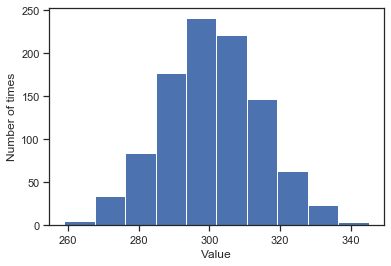

In [269]:
number_of_trials =1000
## Here we simulate the repeated throwing of a single six-sided die
list_of_values = []
for i in range(number_of_trials):
    list_of_values.append(np.sum(np.random.randint(1,6,100)))


pylab.hist(list_of_values)
pylab.xlabel('Value')
pylab.ylabel('Number of times')
pylab.show()


#Получили нормальное распределение. Согласно предельной теореме любая выборка с увеличением  объема стремится к нормальному распределению